In [1]:
import pandas as pd
import numpy as np
import json
from pandas.io.json import json_normalize
from datetime import datetime
from ggplot import *
#https://gist.github.com/sixtenbe/1178136 - peakdetect.py
from peakdetect import peakdetect

In [2]:
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', 100)

In [3]:
#set inline plotting
%matplotlib inline

## Load Data

In [4]:
with open('immig_fromLSM/data/subtopic_percentage.json') as data_file:    
    data = json.load(data_file)

In [5]:
df = json_normalize(data)

In [6]:
df.head(10)

,share,time,topic
0,0.000127,2015-11-19,DAPA/DACA
1,0.069948,2015-11-19,Wall
2,0.016393,2015-11-19,Undocumented/Illegal Immigration
3,0.018305,2015-11-19,Mass Deportation
4,0.000085,2015-11-19,Sanctuary Cities
5,0.037076,2015-11-19,About Immigrants
6,0.044594,2015-11-19,Visa
7,0.010150,2015-11-19,Pathway to Citizenship
8,0.011594,2015-11-19,Amnesty
9,0.658074,2015-11-19,Syrian Refugee crisis


In [7]:
len(df)

5119

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5119 entries, 0 to 5118
Data columns (total 3 columns):
share    5119 non-null float64
time     5119 non-null object
topic    5119 non-null object
dtypes: float64(1), object(2)
memory usage: 160.0+ KB


## Process Data

In [9]:
#convert dates to datetime type
df['time'] = pd.to_datetime(df['time'])

In [10]:
#add column for percent
df['percent'] = df['share'].astype(float).map('{:,.2%}'.format)

## Plot Data 

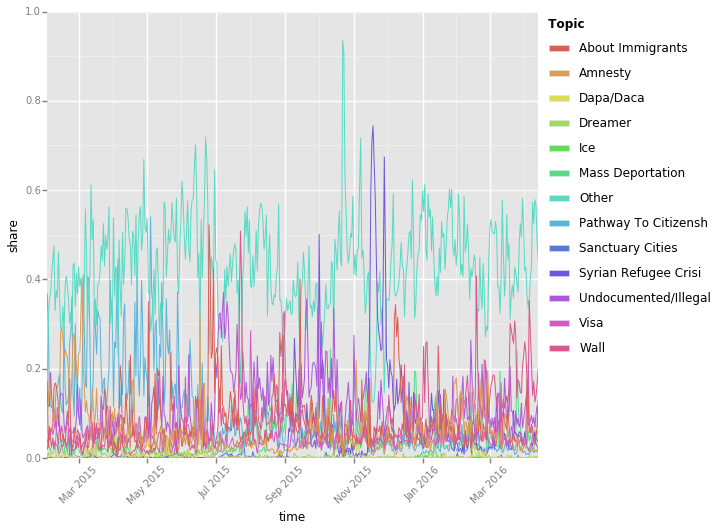

<ggplot: (286774657)>

In [12]:
data = df
x='time'
y ='share'
colour = 'topic'
p = ggplot(aes(x=x, y=y, colour = colour), data=data) 
p + geom_line() + theme(axis_text_x=element_text(angle=45)) 

/Users/kate/venv/lib/python2.7/site-packages/ggplot/stats/stat_smooth.py:22: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  data = data.sort(['x'])


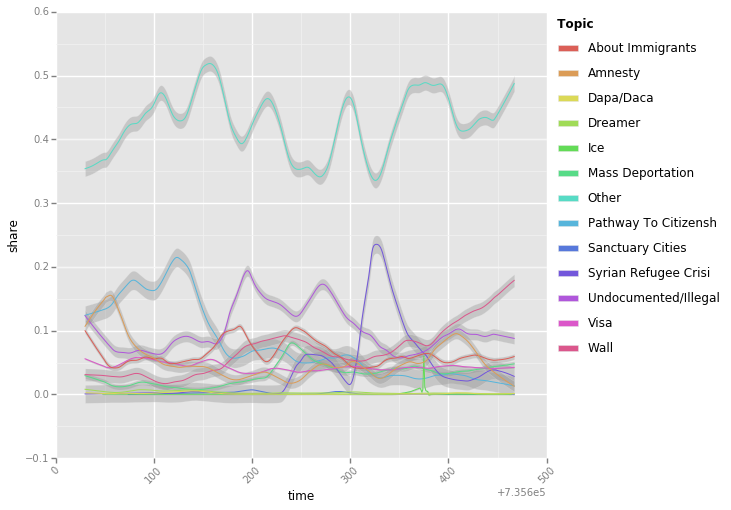

<ggplot: (287739397)>

In [13]:
#smoothed
data = df
x='time'
y ='share'
colour = 'topic'
p = ggplot(aes(x=x, y=y, colour = colour), data=data) + stat_smooth(span=0.10)
p + theme(axis_text_x=element_text(angle=45))

## peak detection

In [14]:
#create function to find and return dataframe of peaks given dataframe, sub-topic name, num of peaks, and lookahead value 
def getpeaks (df, topic, num_spikes, lookahead): 
    sub = df[df['topic'] == topic]
    sub = sub.sort_values(by = 'time', ascending = False)
    sub_peaks = peakdetect(sub['share'], lookahead=lookahead)
    row_pos = pd.DataFrame(sub_peaks[0]).sort_values(by = 1, ascending = False)
    peaks = sub.iloc[row_pos[0].head(num_spikes).tolist(), :]
    return peaks

In [15]:
#get list of sub-topics
topic_list = pd.unique(df.topic.ravel()).tolist()
topic_list

[u'DAPA/DACA',
 u'Wall',
 u'Undocumented/Illegal Immigration',
 u'Mass Deportation',
 u'Sanctuary Cities',
 u'About Immigrants',
 u'Visa',
 u'Pathway to Citizenship',
 u'Amnesty',
 u'Syrian Refugee crisis',
 u'Other',
 u'DREAMer',
 u'ICE']

In [99]:
#run function on each sub-topic
results = []
for item in topic_list: 
    results.append(getpeaks(df, item, 6, 7))

In [100]:
peaks_data = pd.concat(results, axis=0) #concat list of results
peaks_data = peaks_data[peaks_data['topic'] != 'Other'] #remove other 
peaks_data = peaks_data[peaks_data['share'] >= 0.03] # keep only spikes greater than 3%
peaks_data

,share,time,topic,percent
4877,0.050984,2015-05-19,DAPA/DACA,5.10%
4806,0.031250,2015-03-15,DAPA/DACA,3.12%
2604,0.508238,2015-07-23,Wall,50.82%
2973,0.407575,2016-02-18,Wall,40.76%
908,0.352953,2016-04-05,Wall,35.30%
787,0.328005,2015-08-31,Wall,32.80%
1570,0.306925,2016-03-23,Wall,30.69%
2101,0.260561,2016-01-05,Wall,26.06%
249,0.371159,2015-07-08,Undocumented/Illegal Immigration,37.12%
3424,0.356109,2015-09-20,Undocumented/Illegal Immigration,35.61%


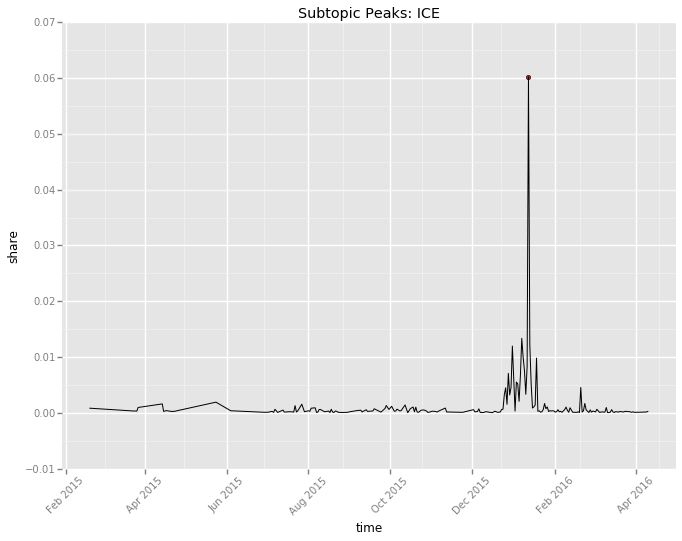

<ggplot: (286400377)>


In [118]:
#plot topics (manually) to visually check peaks correctly identified
topic = "ICE"
data = df[df['topic'] == topic]
peaks = peaks_data[peaks_data['topic'] == topic]
x='time'
y ='share'
p = ggplot(aes(x=x, y=y), data=data)
p = p + geom_line() + theme(axis_text_x=element_text(angle=45)) + geom_point(aes(x=x, y=y), fill='red', data=peaks) + ggtitle("Subtopic Peaks: "+str(topic)) 
print(p)

In [119]:
#if correct, save plot
file_name = "peaks_plot/peaks_"+str(topic)+'.png' 
ggsave(plot = p, filename = file_name)

Saving 11.0 x 8.0 in image.


In [105]:
#correct filenames for topics with illegal characters 
file_name

'peaks_plot/peaks_Undocumented/Illegal Immigration.png'

In [89]:
#recalibrate amnesty, pathway to citizenship, mass deportation, dapa/daca
new_results = []
re_topics = ['DAPA/DACA', 'Pathway to Citizenship', 'Mass Deportation', 'Amnesty']
for item in re_topics: 
    new_results.append(getpeaks(df, item, 5, 25))

In [90]:
new_peaks_data = pd.concat(new_results, axis=0) #concat list of results
new_peaks_data = new_peaks_data[new_peaks_data['topic'] != 'Other'] #remove other 
new_peaks_data = new_peaks_data[new_peaks_data['share'] >= 0.03] # keep only spikes greater than 3%

In [91]:
#getpeaks(df, item, 5, 25)
dapa = new_peaks_data[new_peaks_data['topic'] == 'DAPA/DACA']
dapa

,share,time,topic,percent
4877,0.050984,2015-05-19,DAPA/DACA,5.10%
3095,0.031918,2016-02-15,DAPA/DACA,3.19%
4806,0.031250,2015-03-15,DAPA/DACA,3.12%


In [86]:
#getpeaks(df, item, 8, 26)
pathway = new_peaks_data[new_peaks_data['topic'] == 'Pathway to Citizenship']
pathway

,share,time,topic,percent
1125,0.539808,2015-05-04,Pathway to Citizenship,53.98%
3264,0.195060,2015-11-02,Pathway to Citizenship,19.51%
2033,0.171505,2015-08-02,Pathway to Citizenship,17.15%
4853,0.140175,2015-10-06,Pathway to Citizenship,14.02%
1689,0.119918,2016-03-10,Pathway to Citizenship,11.99%
3005,0.116624,2016-02-12,Pathway to Citizenship,11.66%
389,0.112856,2015-12-17,Pathway to Citizenship,11.29%
3789,0.090055,2016-01-18,Pathway to Citizenship,9.01%


In [50]:
#getpeaks(df, item, 8, 10)
mass = new_peaks_data[new_peaks_data['topic'] == 'Mass Deportation']
mass

,share,time,topic,percent
2876,0.243222,2015-10-11,Mass Deportation,24.32%
1598,0.239856,2016-03-25,Mass Deportation,23.99%
1685,0.194726,2016-03-10,Mass Deportation,19.47%
3640,0.194555,2015-12-25,Mass Deportation,19.46%
62,0.179327,2015-11-12,Mass Deportation,17.93%
3161,0.176032,2015-08-16,Mass Deportation,17.60%
1272,0.166380,2015-09-07,Mass Deportation,16.64%
3001,0.145767,2016-02-12,Mass Deportation,14.58%


In [39]:
#getpeaks(df, item, 5, 25)
amnesty = new_peaks_data[new_peaks_data['topic'] == 'Amnesty']
amnesty

,share,time,topic,percent
1032,0.402142,2015-03-04,Amnesty,40.21%
615,0.320755,2015-06-17,Amnesty,32.08%
3278,0.217733,2015-11-03,Amnesty,21.77%
2416,0.195568,2016-02-28,Amnesty,19.56%
4282,0.175840,2015-04-19,Amnesty,17.58%


In [120]:
#row concat tweaked peak data by topic
tweaked = pd.concat([amnesty, dapa, mass, pathway], axis = 0)
tweaked

,share,time,topic,percent
1032,0.402142,2015-03-04,Amnesty,40.21%
615,0.320755,2015-06-17,Amnesty,32.08%
3278,0.217733,2015-11-03,Amnesty,21.77%
2416,0.195568,2016-02-28,Amnesty,19.56%
4282,0.175840,2015-04-19,Amnesty,17.58%
4877,0.050984,2015-05-19,DAPA/DACA,5.10%
3095,0.031918,2016-02-15,DAPA/DACA,3.19%
4806,0.031250,2015-03-15,DAPA/DACA,3.12%
2876,0.243222,2015-10-11,Mass Deportation,24.32%
1598,0.239856,2016-03-25,Mass Deportation,23.99%


In [122]:
#remove recalibrated topics from initial peaks_data set
#append tweaked peaks data to initial peaks_data
peaks_request = peaks_data[~peaks_data['topic'].isin(re_topics)].append(tweaked)
peaks_request

,share,time,topic,percent
2604,0.508238,2015-07-23,Wall,50.82%
2973,0.407575,2016-02-18,Wall,40.76%
908,0.352953,2016-04-05,Wall,35.30%
787,0.328005,2015-08-31,Wall,32.80%
1570,0.306925,2016-03-23,Wall,30.69%
2101,0.260561,2016-01-05,Wall,26.06%
249,0.371159,2015-07-08,Undocumented/Illegal Immigration,37.12%
3424,0.356109,2015-09-20,Undocumented/Illegal Immigration,35.61%
2822,0.335480,2015-10-14,Undocumented/Illegal Immigration,33.55%
2644,0.298945,2015-07-20,Undocumented/Illegal Immigration,29.89%


In [126]:
peaks_request = peaks_request[['topic', 'share', 'time']] #return original rows 
peaks_request['time'] = peaks_request['time'].astype(str)
peaks_request.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63 entries, 2604 to 3789
Data columns (total 3 columns):
topic    63 non-null object
share    63 non-null float64
time     63 non-null object
dtypes: float64(1), object(2)
memory usage: 2.0+ KB


In [127]:
#save as records to JSON
peaks_request.to_json('immigration_peaks_request.json', orient = 'records', force_ascii=False)